In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import sys
sys.stdout = open("randomforrest.txt", "w")

In [22]:
data = pd.read_csv('master_error.csv')

In [23]:
data.head()

,task_id,worker_id,accuracy,keypress_keytypeint,keytype_changed,mouseclick_button,mousemove_distance,timestamp,work_duration,error
0,57a2997ee2013f0c5a5d9f33,501767d1cb022453170004dc,0,6.879310,0.517241,0.068966,19.722592,1.470270e+12,88.318,1
1,57a2997ee2013f0c5a5d9f34,501767d1cb022453170004dc,1,3.463768,0.217391,0.376812,7.173393,1.470270e+12,34.392,0
2,57a2997ee2013f0c5a5d9f35,501767d1cb022453170004dc,1,4.918367,0.346939,0.061224,22.958495,1.470270e+12,18.640,0
3,57a2997ee2013f0c5a5d9f36,501767d1cb022453170004dc,0,6.209302,0.372093,0.093023,8.415718,1.470270e+12,15.841,1
4,57a2997ee2013f0c5a5d9f37,501767d1cb022453170004dc,1,5.755556,0.333333,0.155556,2.868044,1.470270e+12,15.844,0


In [24]:
data.columns

Index(['task_id', 'worker_id', 'accuracy', 'keypress_keytypeint',
       'keytype_changed', 'mouseclick_button', 'mousemove_distance',
       'timestamp', 'work_duration', 'error'],
      dtype='object')

## With Random Forrest

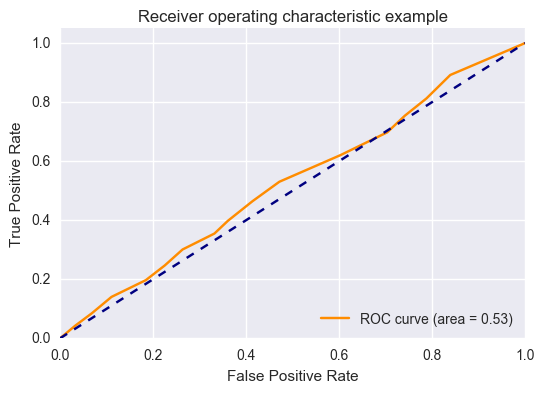

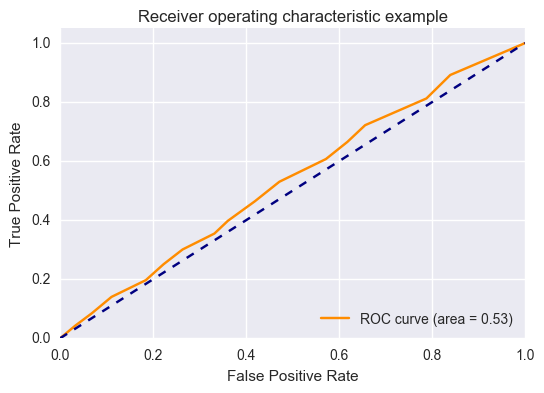

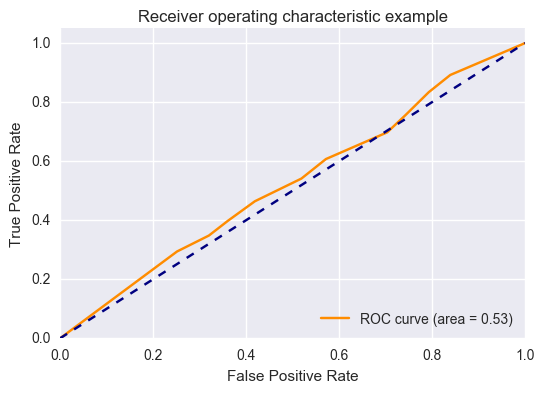

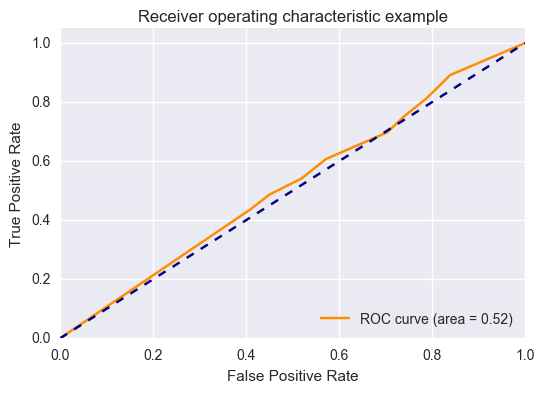

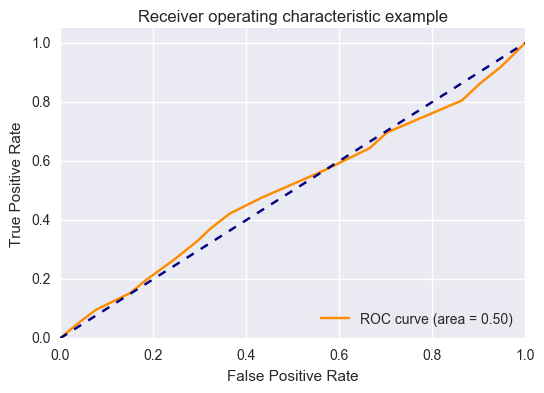

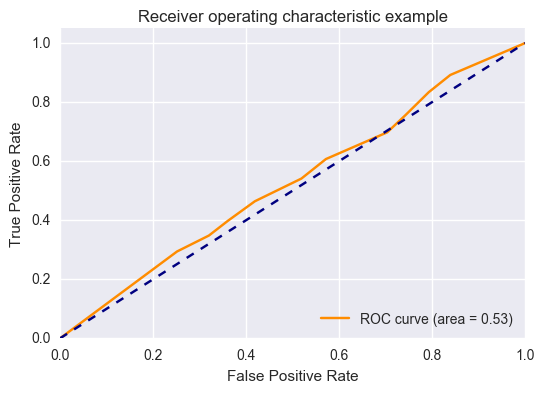

In [25]:
print('Random Forrest Classifier followed by Other models')
# Setting X and Y
x_data = data[['keytype_changed', 'mouseclick_button', 'mousemove_distance', 'work_duration','task_id']]
y_data = data[['error','task_id']]

 
# Importing train_test_split and applying it to X and Y
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state =0)

df_ = pd.DataFrame()
df1_ = pd.DataFrame()

col = ['keytype_changed', 'mouseclick_button', 'mousemove_distance', 'work_duration']
for name in col:
    print (name)
    #print (1)
    x = x_train[[name]]
    y = y_train['error']
    
    #print (2)
    #Importing Random Forrest Classifier and fitting it to data
    from sklearn.ensemble import RandomForestClassifier
    RFC = RandomForestClassifier(n_estimators = 300)
    RFC.fit(x,y) 

    #print (3)
    #Making Predictions and printing results
    predictions = RFC.predict(x)
    predictions1 = RFC.predict(x_test[[name]])
    
    #print (4)
    #Converting array into data frame 
    df = pd.DataFrame(predictions)
    df1 = pd.DataFrame(predictions1)
    #print (df.shape)
    
    #print (5)
    #Concatinating 2 data frames 
    df_ = pd.concat([df_,df], axis = 1 , ignore_index= True)  
    df1_ = pd.concat([df1_,df1], axis = 1 , ignore_index= True)

y_train = y_train.reset_index()
y_train = pd.concat([y_train,df_], axis = 1, ignore_index= False)

y_test = y_test.reset_index()
y_test = pd.concat([y_test,df1_], axis = 1, ignore_index= False)


#Renaming the columns
y_train.rename(columns={0:'keytype_changed',1:'mouseclick_button',2:'mousemove_distance',3:'work_duration'}, inplace = True)
y_test.rename(columns={0:'keytype_changed',1:'mouseclick_button',2:'mousemove_distance',3:'work_duration'}, inplace = True)


#Printing Y_train and Y_test
#print (y_train)
#print (y_test)


#Setting up new X and Y
forrest_x = y_train[['keytype_changed','mouseclick_button','mousemove_distance','work_duration']]
forrest_y = y_train['error']
forrest_x1 = y_test[['keytype_changed','mouseclick_button','mousemove_distance','work_duration']]
forrest_y1 = y_test['error']
y_test = forrest_y1

print ('1')
#LOGISTIC REGRESSION
#Importing logistic resgression and fitting it to data
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(forrest_x,forrest_y)

#Making predictions from test data
predictions = LR.predict(forrest_x)
predictions1 = LR.predict(forrest_x1)
y_score = LR.predict_proba(forrest_x1)

#Printing results 
from sklearn.metrics import classification_report, confusion_matrix
print ('-----------------------------------------------------------------------------------------------------------')
print(' Printing Results For Logistic Regression \n')
print ('TRAIN SET')
print (confusion_matrix(forrest_y, predictions))
print (classification_report(forrest_y, predictions))
print ('TEST SET')
print (confusion_matrix(forrest_y1, predictions1))
print (classification_report(forrest_y1, predictions1))

from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(forrest_y1, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
print ('Area under the ROC Curve %', roc_auc[1])



print ('2')
#KNN
#Importing KNN Classifier and fitting it to data
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors= 500, metric = 'minkowski', p=2)
KNN.fit(forrest_x,forrest_y)

#Making Predictions and printing results
predictions = KNN.predict(forrest_x)
predictions1 = KNN.predict(forrest_x1)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For KNN \n')
print ('TRAIN SET')
print (confusion_matrix(forrest_y, predictions))
print (classification_report(forrest_y, predictions))
print ('TEST SET')
print (confusion_matrix(forrest_y1, predictions1))
print (classification_report(forrest_y1, predictions1))


y_score = KNN.predict_proba(forrest_x1)
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

print ('Area under the ROC Curve %',roc_auc[1])




print ('3')
#RANDOM FORREST CLASSIFIER
#Importing Random Forrest Classifier and fitting it to data
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 200)
RFC.fit(forrest_x,forrest_y) 

#Making Predictions and printing results
predictions = RFC.predict(forrest_x)
predictions1 = RFC.predict(forrest_x1)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For Random Forrest Classifier \n')
print ('TRAIN SET')
print (confusion_matrix(forrest_y, predictions))
print (classification_report(forrest_y, predictions))
print ('TEST SET')
print (confusion_matrix(forrest_y1, predictions1))
print (classification_report(forrest_y1, predictions1))


y_score = RFC.predict_proba(forrest_x1)
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

print ('Area under the ROC Curve %',roc_auc[1])


print ('4')
#NAIVE BAYES CLASSIFIER
#Importing Naive Bayes Classifier and fitting it to data
from sklearn.naive_bayes import GaussianNB
NBC = GaussianNB()
NBC.fit(forrest_x,forrest_y) 

#Making Predictions and printing results
predictions = NBC.predict(forrest_x)
predictions1 = NBC.predict(forrest_x1)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For Naive Bayes Classifier \n')
print ('TRAIN SET')
print (confusion_matrix(forrest_y, predictions))
print (classification_report(forrest_y, predictions))
print ('TEST SET')
print (confusion_matrix(forrest_y1, predictions1))
print (classification_report(forrest_y1, predictions1))

y_score = NBC.predict_proba(forrest_x1)
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

print ('Area under the ROC Curve %',roc_auc[1])




print ('5')
#SVM WITH KERNEL
#Importing SVM with kernel Classifier and fitting it to data
from sklearn.svm import SVC
SVMC = SVC(kernel='rbf', random_state = 0, probability = True)
SVMC.fit(forrest_x,forrest_y) 

#Making Predictions and printing results
predictions = SVMC.predict(forrest_x)
predictions1 = SVMC.predict(forrest_x1)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For SVM Classifier \n')
print ('TRAIN SET')
print (confusion_matrix(forrest_y, predictions))
print (classification_report(forrest_y, predictions))
print ('TEST SET')
print (confusion_matrix(forrest_y1, predictions1))
print (classification_report(forrest_y1, predictions1))

y_score = SVMC.predict_proba(forrest_x1)
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

print ('Area under the ROC Curve %',roc_auc[1])



print ('6')
#DECISION TREE CLASSIFIER
#Importing Decision Tree Classifier Classifier and fitting it to data
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
DTC.fit(forrest_x,forrest_y) 

#Making Predictions and printing results
predictions = DTC.predict(forrest_x)
predictions1 = DTC.predict(forrest_x1)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For Decision Tree Classifier \n')
print ('TRAIN SET')
print (confusion_matrix(forrest_y, predictions))
print (classification_report(forrest_y, predictions))
print ('TEST SET')
print (confusion_matrix(forrest_y1, predictions1))
print (classification_report(forrest_y1, predictions1))

y_score = DTC.predict_proba(forrest_x1)
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

print ('Area under the ROC Curve %',roc_auc[1])

## Logistic Regression

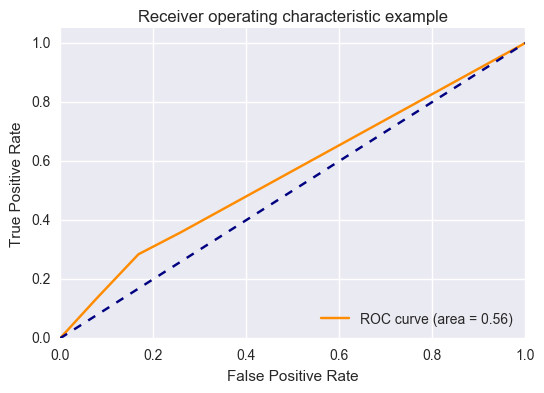

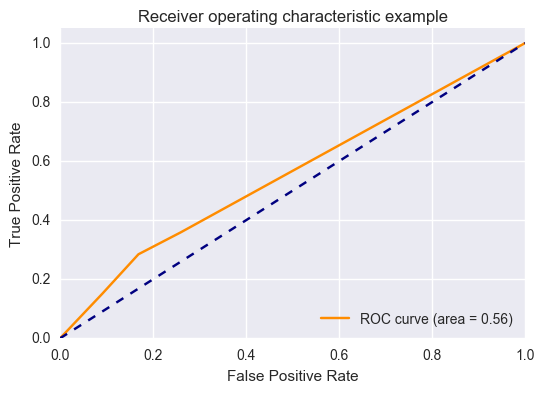

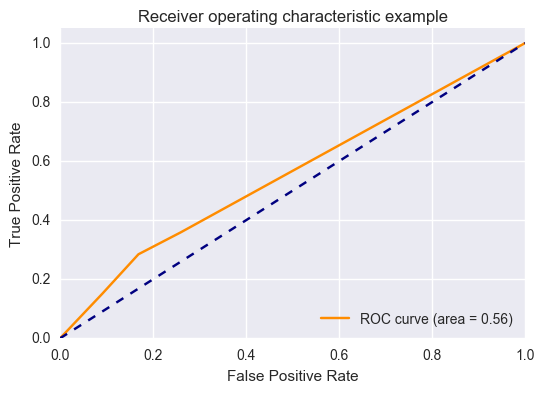

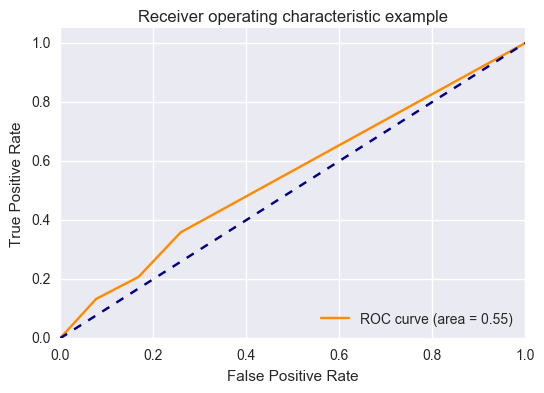

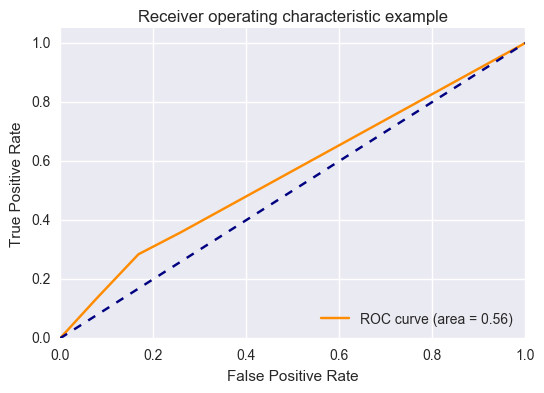

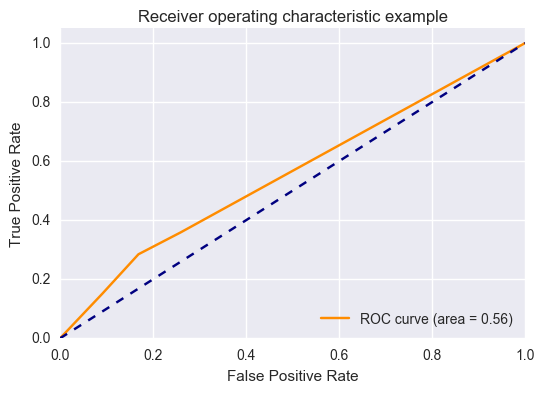

In [27]:
print('Logistic Regression Classifier followed by Other models')
# Setting X and Y
x_data = data[['keytype_changed', 'mouseclick_button', 'mousemove_distance', 'work_duration','task_id']]
y_data = data[['error','task_id']]

 
# Importing train_test_split and applying it to X and Y
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state =0)

df_ = pd.DataFrame()
df1_ = pd.DataFrame()

col = ['keytype_changed', 'mouseclick_button', 'mousemove_distance', 'work_duration']
for name in col:
    print (name)
    #print (1)
    x = x_train[[name]]
    y = y_train['error']
    
    #print (2)
    #Importing Logistic Regression and fitting it to data
    from sklearn.linear_model import LogisticRegression
    LR = LogisticRegression()
    LR.fit(x,y) 

    #print (3)
    #Making Predictions and printing results
    predictions = LR.predict(x)
    predictions1 = LR.predict(x_test[[name]])
    
    #print (4)
    #Converting array into data frame 
    df = pd.DataFrame(predictions)
    df1 = pd.DataFrame(predictions1)
    #print (df.shape)
    
    #print (5)
    #Concatinating 2 data frames 
    df_ = pd.concat([df_,df], axis = 1 , ignore_index= True)  
    df1_ = pd.concat([df1_,df1], axis = 1 , ignore_index= True)

y_train = y_train.reset_index()
y_train = pd.concat([y_train,df_], axis = 1, ignore_index= False)

y_test = y_test.reset_index()
y_test = pd.concat([y_test,df1_], axis = 1, ignore_index= False)


#Renaming the columns
y_train.rename(columns={0:'keytype_changed',1:'mouseclick_button',2:'mousemove_distance',3:'work_duration'}, inplace = True)
y_test.rename(columns={0:'keytype_changed',1:'mouseclick_button',2:'mousemove_distance',3:'work_duration'}, inplace = True)


#Printing Y_train and Y_test
#print (y_train)
#print (y_test)


#Setting up new X and Y
forrest_x = y_train[['keytype_changed','mouseclick_button','mousemove_distance','work_duration']]
forrest_y = y_train['error']
forrest_x1 = y_test[['keytype_changed','mouseclick_button','mousemove_distance','work_duration']]
forrest_y1 = y_test['error']
y_test = forrest_y1


#LOGISTIC REGRESSION
#Importing logistic resgression and fitting it to data
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(forrest_x,forrest_y)

#Making predictions from test data
predictions = LR.predict(forrest_x)
predictions1 = LR.predict(forrest_x1)
y_score = LR.predict_proba(forrest_x1)

#Printing results 
from sklearn.metrics import classification_report, confusion_matrix
print ('-----------------------------------------------------------------------------------------------------------')
print(' Printing Results For Logistic Regression \n')
print ('TRAIN SET')
print (confusion_matrix(forrest_y, predictions))
print (classification_report(forrest_y, predictions))
print ('TEST SET')
print (confusion_matrix(forrest_y1, predictions1))
print (classification_report(forrest_y1, predictions1))

from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(forrest_y1, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
print ('Area under the ROC Curve %',roc_auc[1])




#KNN
#Importing KNN Classifier and fitting it to data
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors= 500, metric = 'minkowski', p=2)
KNN.fit(forrest_x,forrest_y)

#Making Predictions and printing results
predictions = KNN.predict(forrest_x)
predictions1 = KNN.predict(forrest_x1)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For KNN \n')
print ('TRAIN SET')
print (confusion_matrix(forrest_y, predictions))
print (classification_report(forrest_y, predictions))
print ('TEST SET')
print (confusion_matrix(forrest_y1, predictions1))
print (classification_report(forrest_y1, predictions1))


y_score = KNN.predict_proba(forrest_x1)
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

print ('Area under the ROC Curve %',roc_auc[1])





#RANDOM FORREST CLASSIFIER
#Importing Random Forrest Classifier and fitting it to data
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 200)
RFC.fit(forrest_x,forrest_y) 

#Making Predictions and printing results
predictions = RFC.predict(forrest_x)
predictions1 = RFC.predict(forrest_x1)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For Random Forrest Classifier \n')
print ('TRAIN SET')
print (confusion_matrix(forrest_y, predictions))
print (classification_report(forrest_y, predictions))
print ('TEST SET')
print (confusion_matrix(forrest_y1, predictions1))
print (classification_report(forrest_y1, predictions1))


y_score = RFC.predict_proba(forrest_x1)
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

print ('Area under the ROC Curve %',roc_auc[1])


#NAIVE BAYES CLASSIFIER
#Importing Naive Bayes Classifier and fitting it to data
from sklearn.naive_bayes import GaussianNB
NBC = GaussianNB()
NBC.fit(forrest_x,forrest_y) 

#Making Predictions and printing results
predictions = NBC.predict(forrest_x)
predictions1 = NBC.predict(forrest_x1)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For Naive Bayes Classifier \n')
print ('TRAIN SET')
print (confusion_matrix(forrest_y, predictions))
print (classification_report(forrest_y, predictions))
print ('TEST SET')
print (confusion_matrix(forrest_y1, predictions1))
print (classification_report(forrest_y1, predictions1))

y_score = NBC.predict_proba(forrest_x1)
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

print ('Area under the ROC Curve %',roc_auc[1])





#SVM WITH KERNEL
#Importing SVM with kernel Classifier and fitting it to data
from sklearn.svm import SVC
SVMC = SVC(kernel='rbf', random_state = 0, probability = True)
SVMC.fit(forrest_x,forrest_y) 

#Making Predictions and printing results
predictions = SVMC.predict(forrest_x)
predictions1 = SVMC.predict(forrest_x1)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For SVM Classifier \n')
print ('TRAIN SET')
print (confusion_matrix(forrest_y, predictions))
print (classification_report(forrest_y, predictions))
print ('TEST SET')
print (confusion_matrix(forrest_y1, predictions1))
print (classification_report(forrest_y1, predictions1))

y_score = SVMC.predict_proba(forrest_x1)
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

print ('Area under the ROC Curve %',roc_auc[1])

#DECISION TREE CLASSIFIER
#Importing Decision Tree Classifier Classifier and fitting it to data
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
DTC.fit(forrest_x,forrest_y) 

#Making Predictions and printing results
predictions = DTC.predict(forrest_x)
predictions1 = DTC.predict(forrest_x1)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For Decision Tree Classifier \n')
print ('TRAIN SET')
print (confusion_matrix(forrest_y, predictions))
print (classification_report(forrest_y, predictions))
print ('TEST SET')
print (confusion_matrix(forrest_y1, predictions1))
print (classification_report(forrest_y1, predictions1))

y_score = DTC.predict_proba(forrest_x1)
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

print ('Area under the ROC Curve %',roc_auc[1])

from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(forrest_y1,predictions1, predictions1)
roc_auc = auc(false_positive_rate, true_positive_rate)


plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#LOGISTIC REGRESSION
#Importing logistic resgression and fitting it to data
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(forrest_x,forrest_y)

#Making predictions from test data
predictions = LR.predict(forrest_x)
predictions1 = LR.predict(forrest_x1)



Y_pred_proba = LR.predict_proba(forrest_x)
Y_cap = np.c_[forrest_y,Y_pred_proba[:, 1:]]
dataframe = pd.DataFrame(data = Y_cap)
dataframe.to_csv('CAP.csv', sep = ';')




#Printing results 
from sklearn.metrics import classification_report, confusion_matrix
print ('-----------------------------------------------------------------------------------------------------------')
print(' Printing Results For Logistic Regression \n')
print ('TRAIN SET')
print (confusion_matrix(forrest_y, predictions))
print (classification_report(forrest_y, predictions))
print ('TEST SET')
print (confusion_matrix(forrest_y1, predictions1))
print (classification_report(forrest_y1, predictions1))